In [14]:
## We start by running the readability measures script in order to compute the most common readability formulas.
    ## Further reading on https://en.wikipedia.org/wiki/Readability#Popular_readability_formulas
## The readability measures script makes use of the textstat Python library (https://pypi.org/project/textstat/).
%run -i ../scripts/readability_measures.py -i ../data/train.csv -f excerpt -o ../data/outputs/train_complex
%run -i ../scripts/readability_measures.py -i ../data/test.csv -f excerpt -o ../data/outputs/test_complex

[+] Reading file...
[+] Computing readability measures...
[+] Done!
[+] Reading file...
[+] Computing readability measures...
[+] Done!


In [16]:
## Now we can read our datasets with the complexity measures attached.
import pandas as pd

train_df = pd.read_csv('../data/outputs/train_complex.csv', encoding = 'latin-1')
test_df = pd.read_csv('../data/outputs/test_complex.csv', encoding = 'latin-1')


In [17]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error,punctuation_count,punctuation_score,lexicon_count,lexicon_score,sentence_count,sentence_score,rd_automatedindex,rd_fogscale,rd_colemanliau,rd_flesch_ease,rd_linearwrite,rd_fleschkincaid_grade,rd_dalechall,rd_consensus
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,27,3.2967,179,21.8559,11,1.3431,8.3,8.31,8.06,80.31,9.000000,6.1,6.65,9.0
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,56,7.2351,169,21.8346,12,1.5504,7.2,7.53,6.78,82.54,7.285714,5.2,5.92,8.0
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,47,6.2918,166,22.2222,8,1.0710,10.1,10.49,7.20,75.74,14.750000,7.9,6.29,8.0
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,33,4.4177,164,21.9545,5,0.6693,16.4,13.61,8.54,72.02,12.500000,11.4,6.61,7.0
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,32,5.5459,147,25.4766,5,0.8666,11.8,11.76,4.83,75.47,13.500000,10.0,1.57,12.0


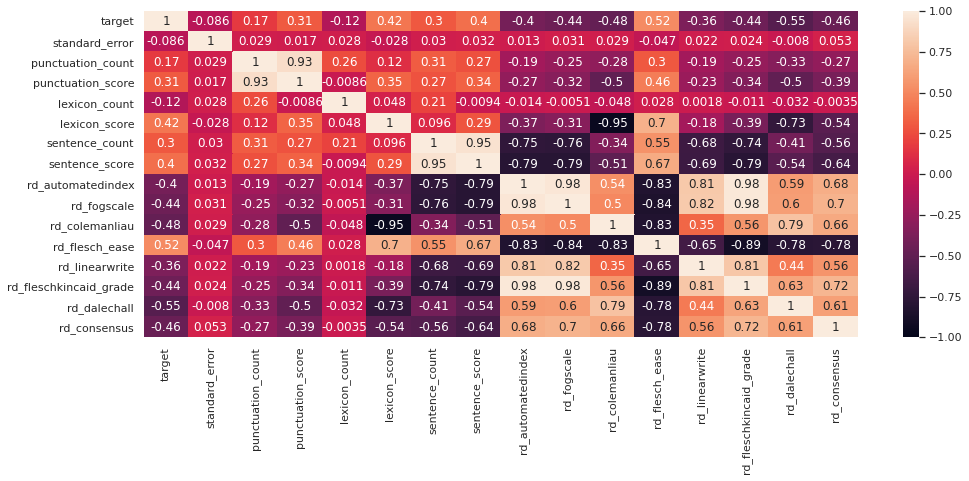

In [30]:
## Finally, we create a heat map to check the correlation between these complexity variables and the target variable 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)

## We can see that there is a moderate correlation with some of these readbility formulas

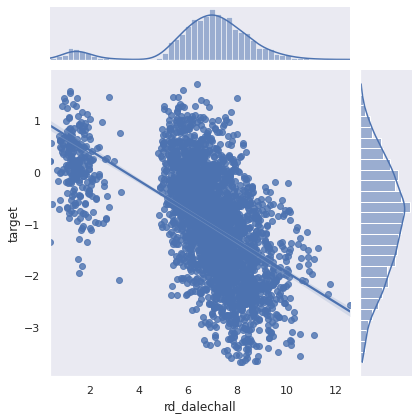

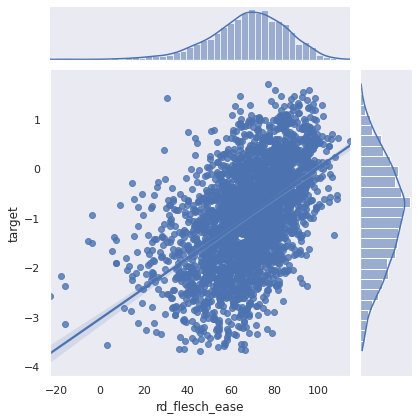

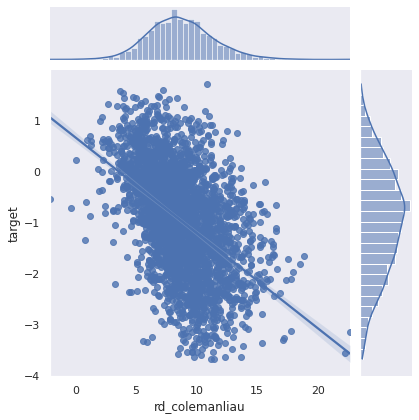

In [29]:
sns.jointplot(x=train_df["rd_dalechall"], y=train_df["target"], kind='reg')
sns.jointplot(x=train_df["rd_flesch_ease"], y=train_df["target"], kind='reg')
sns.jointplot(x=train_df["rd_colemanliau"], y=train_df["target"], kind='reg')